<div class='bar_title'></div>

*Practical Data Science*

# Deep Learning on Tabular Data

Matthias Griebel<br>
Chair of Information Systems and Management

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Artificial-Neural-Networks" data-toc-modified-id="Artificial-Neural-Networks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Artificial Neural Networks</a></span><ul class="toc-item"><li><span><a href="#The-Perceptron" data-toc-modified-id="The-Perceptron-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The Perceptron</a></span></li><li><span><a href="#Multi-layer-Perceptron-aka.-Neural-Networks" data-toc-modified-id="Multi-layer-Perceptron-aka.-Neural-Networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi-layer Perceptron aka. Neural Networks</a></span></li><li><span><a href="#Training-Neural-Networks" data-toc-modified-id="Training-Neural-Networks-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Neural Networks</a></span></li></ul></li><li><span><a href="#Deep-Learning-on-Tabular-Data-with-fast.ai" data-toc-modified-id="Deep-Learning-on-Tabular-Data-with-fast.ai-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deep Learning on Tabular Data with <em>fast.ai</em></a></span><ul class="toc-item"><li><span><a href="#fast.ai-Datasets" data-toc-modified-id="fast.ai-Datasets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><em>fast.ai</em> Datasets</a></span></li><li><span><a href="#Tabular-data-preprocessing" data-toc-modified-id="Tabular-data-preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tabular data preprocessing</a></span></li></ul></li><li><span><a href="#Defining-a-Model" data-toc-modified-id="Defining-a-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Defining a Model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Embeddings-for-Categorical-Variables" data-toc-modified-id="Embeddings-for-Categorical-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Embeddings for Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Taking-Inspiration-from-Word-Embeddings" data-toc-modified-id="Taking-Inspiration-from-Word-Embeddings-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Taking Inspiration from Word Embeddings</a></span></li><li><span><a href="#Applying-Embeddings-for-Categorical-Variables" data-toc-modified-id="Applying-Embeddings-for-Categorical-Variables-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Applying Embeddings for Categorical Variables</a></span></li><li><span><a href="#Visualizing-Embeddings-with-Tensorboard" data-toc-modified-id="Visualizing-Embeddings-with-Tensorboard-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualizing Embeddings with Tensorboard</a></span></li></ul></li></ul></div>

__Lessons Learned Assingment 1__

- Use descriptive commit messages (see example)
- Don't merge pull request

__Credits__

- https://www.fast.ai/2018/04/29/categorical-embeddings/
- https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai 

## Motivation

There is a powerful technique that is winning Kaggle competitions and is widely used at Google (according to [Jeff Dean](https://twimlai.com/twiml-talk-124-systems-software-machine-learning-scale-jeff-dean/)), [Pinterest](https://medium.com/the-graph/applying-deep-learning-to-related-pins-a6fee3c92f5e), and [Instacart](https://tech.instacart.com/deep-learning-with-emojis-not-math-660ba1ad6cdc), yet that many people don’t even realize is possible: 

__the use of deep learning for tabular data, and in particular, the creation of embeddings for categorical variables.__

Despite what you may have heard, you can use deep learning for the type of data you might keep in a SQL database, a Pandas DataFrame, or an Excel spreadsheet (including time-series data).

#### Pinterest: Finding Related Pins

<img src="https://miro.medium.com/max/676/0*i-U3QUkyBhWVX4UK.png" style="width:70%" />

*Source: [Pinterest/Medium](https://medium.com/the-graph/applying-deep-learning-to-related-pins-a6fee3c92f5e)*

__Instacart: Sorting shopping lists with deep learning__


<img src="https://miro.medium.com/max/2454/1*LE3oybWmVghSDjPP99gxYg.png" style="width:80%" />


*Source: [Instacart](https://tech.instacart.com/deep-learning-with-emojis-not-math-660ba1ad6cdc)*

## Artificial Neural Networks

__What are neural networks?__

- Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron
- Artificial Neural Networks (ANN) are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks
- The creation of ANN begins with the most basic form, a single perceptron

<img src="https://www.extremetech.com/wp-content/uploads/2013/09/340-640x426.jpg" style="width:100%" />






### The Perceptron

Developed by Frank Rosenblatt in 1957

- Perceptrons have one or more weighted inputs, a bias, an activation function, and a single output
- A perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output
- The key idea is to “fire” / activate the neuron only if a sufficiently strong input signal is detected

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png" style="width:100%" />


__Different Activation Functions and their Graphs__

<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" style="width:100%" />

[Image Source](https://medium.com/@shrutijadon10104776/survey-on-activation-functions-for-deep-learning-9689331ba092)

ReLU is the most commonly used Activation Functions, because of its simplicity during backpropagation and its not computationally expensive

### Multi-layer Perceptron aka. Neural Networks

A MLP is composed of multiple layers of perceptrons 

<img src="https://camo.githubusercontent.com/d95fb90b396fc77c614cc6b176dd049066273f96/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f717334746f6a763575356834386c662f6d756c74696c617965725f70657263657074726f6e2e706e673f7261773d31" style="width:80%" />

[Image Source](https://github.com/PetarV-/TikZ/tree/master/Multilayer%20perceptron)

__Layers of a MLP__

- Initial layer = input layer which is fed by the feature inputs
- Last layer = output layer which creates the resulting outputs
- Any layers in between are known as hidden layers because they do not directly “observe” the feature inputs or outputs

__Universal approximation theorem__

From Wikipedia:

_"In the mathematical theory of artificial neural networks, the universal approximation theorem states that a feed-forward network with __a single hidden layer__ containing a finite number of neurons can approximate continuous functions [...] when given appropriate parameters; however, it does not touch upon __the algorithmic learnability of those parameters__."_

### Training Neural Networks

Learning is adjustment of the weights of the connections between perceptrons according to some modification rule. 

- The Backpropagation algorithm searches for weight values that minimize the total error of the network over the set of training examples

It consists of the repeated application of the following two passes.

- __Forward pass__: in this step the network is activated on one example and the error of (each neuron of) the output layer is computed
- __Backward pass__: in this step the network error is used for updating the weights

__Forward and Backward paths__

<img src="https://miro.medium.com/max/3108/1*6q2Rgd8W9DoCN9Wfwc_9gw.png" style="width:60%" />

[Image Source](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)

__MLP Example__

We will work with the same dataset as in the last lecture, a sample of the adult dataset which has some census information on individuals. Again, we'll use it to train a model to predict whether salary is greater than $50k or not.

Load packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Load data set

In [2]:
file_path = 'https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/data/adult.csv'
adult_data = pd.read_csv(file_path)
adult_data = adult_data.assign(salary=(adult_data['salary']=='>=50k').astype(int))
y = adult_data['salary']
remove_cols = ['salary', 'salary']
X = adult_data.drop(remove_cols, axis=1)
X = adult_data.drop(columns=['salary'])

Split data set

In [3]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

Impute missing values (we will omit the categorical features here)

In [4]:
simple_imputer = SimpleImputer()
numCols = X.select_dtypes(['int', 'float']).columns.to_list()
train_X_num = pd.DataFrame(simple_imputer.fit_transform(train_X[numCols]), columns=numCols, index=train_X.index)
val_X_num = pd.DataFrame(simple_imputer.transform(val_X[numCols]), columns=numCols, index=val_X.index)

Standardize numeric features

In [5]:
scaler = StandardScaler()
train_X_num_standardized = pd.DataFrame(scaler.fit_transform(train_X_num), columns=numCols, index=train_X.index)
val_X_num_standardized = pd.DataFrame(scaler.transform(val_X_num), columns=numCols, index=val_X.index)

Train model

In [6]:
model = MLPClassifier()
model.fit(train_X_num_standardized, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Evaluate predictions

In [7]:
preds = model.predict(val_X_num_standardized)
accuracy_score(val_y, preds)

0.8272685398433901

__Advantages of Multi-layer Perceptrons__

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using `partial_fit`

__The disadvantages of Multi-layer Perceptrons__
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

[from scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

__Is this already deep learning?__

From Wikipedia: 

_"Deep learning [...] uses multiple layers to progressively extract higher level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces."_ 


## Deep Learning on Tabular Data with *fast.ai*

__Mission of fast.ai__

Deep learning is transforming the world. We are making deep learning easier to use and getting more people from all backgrounds involved through our:

- free courses for coders
- software library
- cutting-edge research
- community

The world needs everyone involved with AI, no matter how unlikely your background.

from [fast.ai](https://www.fast.ai/about/)

First, let's import everything we need for the tabular application.

In [8]:
from fastai import * 
from fastai.tabular import * 

`from <module> import *` means “I want access to all the names in <module> that I’m meant to have access to”

### *fast.ai* Datasets

Tabular data usually comes in the form of a delimited file (such as .csv) containing variables of different kinds: text/category, numbers, and perhaps some missing values. 

*Fast.ai's* [dataset module](https://docs.fast.ai/datasets.html#datasets) has necessary functions to be able to download several useful [datasets](https://course.fast.ai/datasets) that we might be interested in using in our models.

We will work with the same dataset as in the last lecture, a sample of the __adult dataset__ which has some census information on individuals. Again, we'll use it to train a model to predict whether salary is greater than \$50k or not.

In [9]:
path = untar_data(url=URLs.ADULT_SAMPLE); path

/Users/matjes/anaconda3/envs/pds1920/lib/python3.7/site-packages/fastai/datasets.py:75: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


PosixPath('/Users/matjes/.fastai/data/adult_sample')

`untar_data()`downloads a dataset from `url` and unpacks it to `path`.

In [10]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


Here all the information that will form our input is in the 14 first columns, and the dependent variable is the last column. We will split our input between two types of variables: categorical and continuous.

- **Categorical variables** will be replaced by a category - a unique id that identifies them - before they are passed through an embedding layer.
- **Continuous variables** will be normalized and then directly fed to the model.

Another thing we need to handle are the missing values: our model isn't going to like receiving NaNs so we should remove them in a smart way.



### Tabular data preprocessing

fast.ai contains classes that define [transformations](https://docs.fast.ai/tabular.transform.html) for preprocessing dataframes of tabular data. Preprocessing includes things like

- `Categorify`: replacing non-numerical variables by categories, i.e, their unique category id
- `FillMissing`: filling missing values (default fill strategy: median)
- `Normalize:` normalizing continuous variables

We can define a list of Transforms that will be applied to our variables. Here we transform all categorical variables into categories. We also replace missing values for continuous variables by the median column value and normalize those.

In [11]:
procs = [FillMissing, Categorify, Normalize]

__Categorical and continuous variables__

Then let's manually assign our variables to dependent, categorical and continuous variables
- fast.ai will assume all variables that aren't dependent or categorical are continuous, unless we explicitly pass a list to the `cont_names` parameter when constructing our DataBunch.

In [12]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 
             'relationship', 'race', 'sex', 'native-country']

__Training and validation sets__

To split our data into training and validation sets, we use valid indexes

In [13]:
train_idx, valid_idx = train_test_split(range(len(df)), test_size=0.2, random_state = 0)
train_idx[:5]

[15282, 24870, 18822, 26404, 7842]

__Creating the DataBunch__

Now we're ready to pass this information to `TabularDataBunch.from_df` to create the DataBunch that we'll use for training. We will learn the details of the `DataBunch` class in the next lecture.

In [14]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, 
                                procs=procs, cat_names=cat_names, bs=32)

We can grab a mini-batch of data and take a look. `show_batch` shows a batch of data in a convenient way:

In [15]:
data.show_batch(1)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,capital-loss,fnlwgt,hours-per-week,education-num,capital-gain,target
Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,False,1.7109,-0.2169,-0.5080,-1.9734,-0.4200,-0.1464,<50k


After being processed, the categorical variables are replaced by ids and the continuous variables are normalized. The codes corresponding to categorical variables are all put together, as are all the continuous variables.

__Note__: As we pick out batches randomly, the output of `show_batch` may not correspond to the output below.

In [ ]:
next(iter(data.train_dl))

__A few things to keep in mind here__

- __Data Bunch__: A data format for fast.ai input
- __Dependent variable__: The variable to predict
- __Categorical columns__: The text/label columns. Or the columns with low cardinality, eg. gender, type, year etc.
- __Continuous columns__: Numeric value columns, usually with higher cardinality, eg. salary, price, temperature.
- __Transformations__: Feature engineering and handling data, eg. Missing values, Normalisation etc

## Defining a Model

Once we have our data ready in a `DataBunch`, we just need to create a model to then define a Learner and start training. 

This is typically composed of following steps :

1. __Create Learner__: Create an appropriate learner for data. A learner creates a neural network for us.
2. __Find the learning rate__: We need to find a suitable learning rate for our training
3. __Fit the model__

__Create Learner__

The fastai library has a flexible and powerful `TabularModel` in `models.tabular`. To use that function, we just need to specify the embedding sizes for each of our categorical variables.

In [16]:
learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=accuracy)

__Schematic Network architecture__

Fastai figures out the default values for our model but lot of these can be customised while creating the data bunch and learner. 


<img src="https://confusedcoders.com/wp-content/uploads/2019/06/untitled-3-1024x403.jpg" style="width:100%" />

[Source](https://confusedcoders.com/wp-content/uploads/2019/06/untitled-3-1024x403.jpg)

Let's print a summary of the model.

In [17]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [32, 6]              60         True      
______________________________________________________________________
Embedding            [32, 8]              136        True      
______________________________________________________________________
Embedding            [32, 5]              40         True      
______________________________________________________________________
Embedding            [32, 8]              128        True      
______________________________________________________________________
Embedding            [32, 5]              35         True      
______________________________________________________________________
Embedding            [32, 4]              24         True      
______________________________________________________________________
Embedding            [32, 3]              9          True      
______________________________________________________________

__Find the learning rate__

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


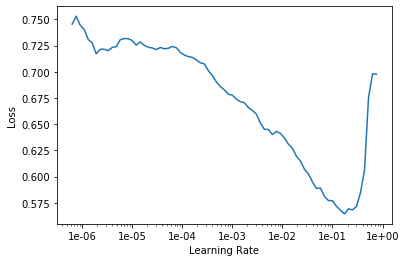

In [19]:
learn.recorder.plot()

We typically find the point where the slope is steepest

__Fit the model__ based on selected learning rate

In [20]:
learn.fit_one_cycle(2, max_lr=slice(1e-02))

epoch,train_loss,valid_loss,accuracy
1,0.354564,0.328987,0.841548
2,0.328493,0.318304,0.851374


## Model Evaluation

__Get predictions__

We can use the `Learner.predict` method to get predictions. In this case, we need to pass the row of a dataframe that has the same names of categorical and continuous variables as our training or validation dataframe.

In [21]:
learn.predict(df.iloc[1])

(Category >=50k, tensor(1), tensor([0.2780, 0.7220]))

To get predictions on the entire training dataset, simply set the ds_type argument accordingly.

In [22]:
learn.get_preds(ds_type=DatasetType.Valid)

[tensor([[0.8683, 0.1317],
         [0.1722, 0.8278],
         [0.9985, 0.0015],
         ...,
         [0.0871, 0.9129],
         [0.2822, 0.7178],
         [0.9790, 0.0210]]), tensor([0, 0, 0,  ..., 1, 1, 0])]

__Show rows result of predictions on thme dataset__

In [23]:
learn.show_results(ds_type=DatasetType.Valid)

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,capital-loss,fnlwgt,hours-per-week,education-num,capital-gain,target,prediction
Self-emp-not-inc,5th-6th,Married-civ-spouse,Farming-fishing,Husband,White,Male,Canada,False,1.8574,-0.2169,0.0323,2.3832,-2.7694,-0.1464,<50k,<50k
Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,United-States,False,1.4912,4.1123,1.1793,0.7696,0.3631,-0.1464,<50k,>=50k
Private,HS-grad,Never-married,Sales,Own-child,White,Female,United-States,False,-1.4379,-0.2169,0.0797,-0.4405,-0.4200,-0.1464,<50k,<50k
?,Assoc-acdm,Never-married,?,Own-child,White,Female,United-States,False,-0.5591,-0.2169,-1.4378,-1.2473,0.7547,-0.1464,<50k,<50k
Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,False,-0.2662,-0.2169,-1.4832,1.5764,0.7547,-0.1464,<50k,<50k


__Get metric scores__

In [24]:
str(learn.metrics)

'[<function accuracy at 0x1a23f021e0>]'

In [25]:
learn.validate(learn.data.valid_dl)

[0.31830403, tensor(0.8514)]

So there is a scope of improving the deep learning model here. However this is not bad at all, without any feature engineering and network tuning.

## Embeddings for Categorical Variables

A key technique to making the most of deep learning for tabular data is to use embeddings for your categorical variables. This approach allows for __relationships between categories__ to be captured.

Examples:
- Saturday and Sunday may have similar behavior, and maybe Friday behaves like an average of a weekend and a weekday. 
-  Similarly, for zip codes, there may be patterns for zip codes that are geographically near each other, and for zip codes that are of similar socio-economic status.

### Taking Inspiration from Word Embeddings

A way to capture these multi-dimensional relationships between categories is to use embeddings. This is the same idea as is used with word embeddings, such as Word2Vec.

<img src="https://www.tensorflow.org/images/linear-relationships.png" style="width:100%" />

[Source](https://www.tensorflow.org/images/linear-relationships.png)


### Applying Embeddings for Categorical Variables

Similarly, when working with categorical variables, we will represent each category by a vector of floating point numbers (the values of this representation are learned as the network is trained).

For instance, a 4-dimensional version of an embedding for day of week could look like:

__Sunday	 [.8, .2, .1, .1]__<br>
__Monday	[.1, .2, .9, .9]__<br>
__Tuesday	[.2, .1, .9, .8]__

Here, Monday and Tuesday are fairly similar, yet they are both quite different from Sunday. 

Again, this is a toy example. In practice, our neural network would learn the best representations for each category while it is training, and each dimension (or direction, which doesn’t necessarily line up with ordinal dimensions) could have multiple meanings. Rich relationships can be captured in these distributed representations.

### Visualizing Embeddings with Tensorboard

TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables 

- tracking experiment metrics like loss and accuracy, 
- visualizing the model graph, 
- projecting embeddings to a lower dimensional space, 
- and much more.

Let's the TensorBoard notebook extension

In [ ]:
%load_ext tensorboard

The SummaryWriter class is your main entry to log data

In [ ]:
from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard
writer = SummaryWriter()

Write model architecture:

In [ ]:
writer.add_graph(learn.model, next(iter(data.train_dl))[0])

Export embeddings:

In [ ]:
emb_names = list(learn.data.x.classes.keys())
for i, emb in enumerate(learn.model.embeds):
    emb_name = emb_names[i]
    writer.add_embedding(emb.weight.data, metadata=learn.data.x[0].classes[emb_name],
                         global_step=i, tag=emb_name)

Finally, start tensorboard

In [ ]:
%tensorboard --logdir runs --host localhost

___Colab Workaround___

In Colab the dynamic tensorborad plugin isn’t supported yet, but you can still access the data and visualize the embeddings somewhere else: 

1. Download the desired embedding file (*tensors.tsv*) and metadata 
<img src="https://raw.githubusercontent.com/wi3jmu/PDS1920/master/Lecture/images/05/colab_download.png" style="width:30%"/>
 
2. Upload the files on the official Tensorflow [Embedding Projector](https://projector.tensorflow.org/)